In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0               Player  Nation    Pos  \
0              0       Milan Škriniar  sk SVK     DF   
1              1      Maxence Lacroix  fr FRA     DF   
2              2          Wataru Endo  jp JPN     MF   
3              3           Unai López  es ESP     MF   
4              4        Mario Hermoso  es ESP     DF   
...          ...                  ...     ...    ...   
1491        2490  Filippo Terracciano  it ITA  DF,FW   
1492        2495       Jonathan Viera  es ESP     MF   
1493        2496       Alan Virginius  fr FRA     FW   
1494        2505       Bryan Zaragoza  es ESP  FW,MF   
1495        2507         Nadir Zortea  it ITA     DF   

                             Squad                              Comp  Age  \
0                  Paris S-G+Inter             fr Ligue 1+it Serie A  0.0   
1                        Wolfsburg                     de Bundesliga  0.0   
2              Liverpool+Stuttgart  eng Premier League+de Bundesliga  0.0   
3     Rayo Vallecano+Athletic Club                        es La Liga  0.0   
4                  Atlético Madrid                        es La Liga  0.0   
...                            ...                               ...  ...   
1491           Hellas Verona+Milan                        it Serie A  0.0   
1492            Las Palmas+Almería                        es La Liga  0.0   
1493           Lille+Clermont Foot                        fr Ligue 1  0.0   
1494         Granada+Bayern Munich          es La Liga+de Bundesliga  0.0   
1495            Frosinone+Atalanta                        it Serie A  0.0   

        Born     MP  Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
0     1995.0  112.0   103.0   9325  103.7         0.06       0.06        0.06   
1     2000.0  111.0   103.0   9070  100.8         0.06       0.08        0.06   
2     1993.0  128.0   119.0  10498  116.6         0.11       0.19        0.11   
3     1995.0  122.0    68.0   5946   66.0         0.07       0.14        0.07   
4     1995.0  114.0   104.0   9110  101.1         0.06       0.11        0.06   
...      ...    ...     ...    ...    ...          ...        ...         ...   
1491  2003.0   21.0    15.0   1372   15.2         0.00       0.07        0.00   
1492  1989.0   21.0    19.0   1529   17.0         0.12       0.35        0.00   
1493  2003.0   16.0    13.0   1005   11.2         0.00       0.18        0.00   
1494  2001.0   28.0    19.0   1821   20.2         0.30       0.40        0.25   
1495  1999.0   19.0    14.0   1407   15.7         0.13       0.45        0.13   

      G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
0             0.06      0.06          0.08        0.06            0.08   
1             0.08      0.04          0.06        0.04            0.06   
2             0.19      0.11          0.18        0.10            0.18   
3             0.14      0.07          0.18        0.07            0.18   
4             0.11      0.07          0.10        0.07            0.10   
...            ...       ...           ...         ...             ...   
1491          0.07      0.02          0.02        0.02            0.02   
1492          0.24      0.21          0.59        0.12            0.36   
1493          0.18      0.12          0.15        0.12            0.15   
1494          0.35      0.21          0.32        0.17            0.27   
1495          0.45      0.03          0.19        0.03            0.19   

      Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
0                   28.0           23.0           82.14               4.0   
1                   75.0           58.0           77.33              17.0   
2                  178.0          111.0           62.36              59.0   
3                  115.0           63.0           54.78              51.0   
4                   64.0           42.0           65.62              18.0   
...                  ...            ...             ...               ...   
1491   

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0             Player   Nation    Pos                  Squad  \
0              0         Max Aarons  eng ENG     DF            Bournemouth   
1              1   Brenden Aaronson   us USA  MF,FW           Union Berlin   
2              4   Yunis Abdelhamid   ma MAR     DF                  Reims   
3              5  Salis Abdul Samed   gh GHA     MF                   Lens   
4              7    Laurent Abergel   fr FRA     MF                Lorient   
...          ...                ...      ...    ...                    ...   
1492         134  Alessandro Zanoli   it ITA  DF,FW     Salernitana+Napoli   
1493         135       Duván Zapata   co COL     FW        Torino+Atalanta   
1494         136     Bryan Zaragoza   es ESP  FW,MF  Granada+Bayern Munich   
1495         138       Nadir Zortea   it ITA     DF     Frosinone+Atalanta   
1496         139        Milan Đurić   ba BIH     FW    Hellas Verona+Monza   

                          Comp  Age    Born  MP  Starts   Min   90s  \
0           eng Premier League  0.0  2000.0  20      13  1237  13.7   
1                de Bundesliga  0.0  2000.0  30      14  1267  14.1   
2                   fr Ligue 1  0.0  1987.0  31      31  2781  30.9   
3                   fr Ligue 1  0.0  2000.0  27      17  1519  16.9   
4                   fr Ligue 1  0.0  1993.0  33      32  2860  31.8   
...                        ...  ...     ...  ..     ...   ...   ...   
1492                it Serie A  0.0  2000.0  21      10   973  10.8   
1493                it Serie A  0.0  1991.0  37      36  2992  33.2   
1494  es La Liga+de Bundesliga  0.0  2001.0  28      19  1821  20.2   
1495                it Serie A  0.0  1999.0  19      14  1407  15.7   
1496                it Serie A  0.0  1990.0  37      26  2461  27.4   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.00       0.07        0.00          0.07      0.00   
1            0.14       0.28        0.14          0.28      0.14   
2            0.13       0.13        0.10          0.10      0.11   
3            0.00       0.00        0.00          0.00      0.05   
4            0.06       0.09        0.06          0.09      0.04   
...           ...        ...         ...           ...       ...   
1492         0.00       0.19        0.00          0.19      0.02   
1493         0.39       0.51        0.39          0.51      0.34   
1494         0.30       0.40        0.25          0.35      0.21   
1495         0.13       0.45        0.13          0.45      0.03   
1496         0.33       0.40        0.29          0.36      0.27   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.06        0.00            0.06                34.0   
1             0.27        0.14            0.27                77.0   
2             0.12        0.09            0.09                15.0   
3             0.08        0.05            0.08                19.0   
4             0.10        0.04            0.10                65.0   
...            ...         ...             ...                 ...   
1492          0.02        0.02            0.02                26.0   
1493          0.44        0.34            0.44               114.0   
1494          0.32        0.17            0.27               145.0   
1495          0.19        0.03            0.19                52.0   
1496          0.39        0.19            0.21                 7.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              14.0            41.2              12.0               35.3   
1              34.0            44.2              41.0               53.2   
2               8.0            53.3               7.0               46.7   
3               7.0            36.8              11.0               57.9   
4              44.0            67.7              18.0               27.7   
...             ...             ...               ...                ...   
1492            6.0       

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (MF) and defenders (DF) from the 'final_player' DataFrame
midfielder_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
midfielder_players = midfielder_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024=player_2024.reset_index(drop=True)

In [6]:
Rodri = midfielder_players[midfielder_players['Player'] == 'Rodri']
Rodri

Unnamed: 0 Player  Nation Pos            Squad                Comp  Age  \
48         195  Rodri  es ESP  MF  Manchester City  eng Premier League  0.0   

      Born     MP  Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
48  1996.0  137.0   132.0  11474  127.4         0.15        0.3        0.14   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
48          0.29       0.1          0.19         0.1            0.18   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
48               156.0          107.0           68.59              37.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
48              23.72          106.07                    3.28   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
48                   19.77                   65.44                   21.58   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
48                    1.91                     106.06   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
48                       1.22                  0.84                     0.29   

    Carries_per_90  Total_Distance_per_90  \
48           66.52                 303.38   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
48                               163.36                        1.86   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
48                2.02                         0.23                0.68   

    Dispossessed_per_90  Passes_Received_per_90  \
48                 0.75                   82.66   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
48                                1.34                        3.35   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
48                     0.38                   2.87                   0.02   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
48                  0.13              0.17                     0.07   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
48                   2.87                   0.31                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
48                  0.03              0.01                     0.01   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
48                   0.01           11273.0           12331.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
48              91.42        199750.0         50302.0            4993.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
48            5331.0              93.75             4813.0             5149.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
48               93.47           1207.0           1434.0             84.17   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
48            0.07        0.09       0.11          0.07               1.09   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
48               8.98                        1.19   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
48                         0.06                       9.01   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
48                    96.79                    95.07                     1.62   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
48                     1.42                  0.18             0.83   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
48            0.32                    0.13                 0.03   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
48                     0.0                      0.0                      0.0   

    Passes_Cmp

In [7]:
player_2024[player_2024['Player']=='Rodri']

Unnamed: 0 Player  Nation Pos            Squad                Comp  Age  \
246        2251  Rodri  es ESP  MF  Manchester City  eng Premier League  0.0   

       Born  MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
246  1996.0  34      34  2931  32.6         0.25       0.52        0.25   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
246          0.52      0.12          0.24        0.12            0.24   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
246                64.0           42.0            65.6              14.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
246               21.9          122.33                     3.5   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
246                   20.37                   71.69                   31.07   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
246                    2.45                     122.33   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
246                       1.96                  1.29                     0.43   

     Carries_per_90  Total_Distance_per_90  \
246           77.09                 355.06   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
246                               196.56                        2.33   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
246                 2.7                         0.37                0.71   

     Dispossessed_per_90  Passes_Received_per_90  \
246                 0.98                   99.45   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
246                                1.69                        4.82   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
246                     0.71                   3.99                   0.06   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
246                  0.25              0.15                     0.18   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
246                   0.18                   0.52                    0.0   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
246                  0.09              0.03                     0.03   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
246                   0.03            3365.0            3656.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
246               92.0         57256.0         15766.0            1676.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
246            1774.0               94.5             1273.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
246             1360.0                93.6            340.0            401.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
246              84.8            0.28        0.12       0.19          0.16   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
246                1.5               11.6                        1.87   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
246                          0.0                      11.53   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
246                   112.15                   109.57   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
246                     2.42                     2.12                  0.46   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
246              1.1            0.37                    0.18   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
246                 0.09                     0.0                      0.0   

     Str_Corner_Kic

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of Rodri's stats from the percentile ranks DataFrame
rodri_percentile_ranks = round(players_percentile_ranks.iloc[[48]],0)

# Print the percentile ranks for Rodri
print(rodri_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
48         78.0       82.0        80.0          83.0      61.0          59.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
48        67.0            58.0                81.0           87.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
48            92.0              64.0                5.0           100.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
48                    87.0                    97.0                   100.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
48                    90.0                    74.0                      100.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
48                       42.0                  58.0                     19.0   

    Carries_per_90  Total_Distance_per_90  \
48            99.0     

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
rodri_percentile_ranks_percentile_ranks_sorted = rodri_percentile_ranks.T.sort_values(by=48, ascending=False)

# Get the top 20 parameters
top_20_params = rodri_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = rodri_percentile_ranks_percentile_ranks_sorted[48].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Passes_Short_Att', 'Touches_Mid_3rd_per_90', 'Passes_Total_Att',
       'Passes_Total_Cmp', 'Passes_Short_Cmp', 'Passes_Medium_Cmp',
       'Passes_Medium_Att', 'Passes_Long_Cmp', 'Passes_Received_per_90',
       'Passes_PrgDist', 'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90',
       'Tocuhes_Live_Balls_per_90', 'Passes_Cmp_per_90', 'Passes_TotDist',
       'Touches_per_90', 'Passes_Long_Att', 'Carries_per_90',
       'Passes_Total_Cmp%', 'Ball_Recoveries_per_90',
       'Percentage_of_Aerials_Won', 'Passes_Long_Cmp%', 'Passes_1/3_per_90',
       'Progressive_Distance_Carried_per_90', 'Progressive_Passes_per_90',
       'Total_Distance_per_90', 'Xg_net', 'Npxg_net', 'Passes_Medium_Cmp%',
       'Touches_Def_3rd_per_90'],
      dtype='object')
Values:
Passes_Short_Att                       100.0
Touches_Mid_3rd_per_90                 100.0
Passes_Total_Att                       100.0
Passes_Total_Cmp                       100.0
Passes_Short_Cmp         

In [10]:
import pandas as pd

params = [
    "Passes_Total_Att", 
    "Passes_Total_Cmp", 
    "Passes_PrgDist", 
    "Touches_Mid_3rd_per_90", 
    "Passes_Short_Cmp", 
    "Passes_Medium_Cmp", 
    "Carries_per_90", 
    "Progressive_Passes_per_90", 
    "Touches_Def_3rd_per_90", 
    "Passes_Long_Cmp%", 
    "Ball_Recoveries_per_90", 
    "Progressive_Distance_Carried_per_90", 
    "Passes_1/3_per_90", 
    "Touches_per_90", 
    "Passes_Long_Cmp%"
]


# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
rodri_percentile_ranks = round(players_percentile_ranks.iloc[[48]],0)

# Print the percentile ranks for the player
rodri_percentile_ranks


Passes_Total_Att  Passes_Total_Cmp  Passes_PrgDist  \
48             100.0             100.0           100.0   

    Touches_Mid_3rd_per_90  Passes_Short_Cmp  Passes_Medium_Cmp  \
48                   100.0             100.0              100.0   

    Carries_per_90  Progressive_Passes_per_90  Touches_Def_3rd_per_90  \
48            99.0                       98.0                    97.0   

    Passes_Long_Cmp%  Ball_Recoveries_per_90  \
48              99.0                    99.0   

    Progressive_Distance_Carried_per_90  Passes_1/3_per_90  Touches_per_90  \
48                                 99.0               99.0           100.0   

    Passes_Long_Cmp%  
48              99.0

In [11]:
rodri_percentile_ranks_list = rodri_percentile_ranks.values.flatten().tolist()

rodri_percentile_ranks_list

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.0,
 98.0,
 97.0,
 99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 99.0]

In [12]:
# Calculate percentile ranks for players in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
rodri_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[246]],0)

# Print the percentile ranks for the player
rodri_2024_percentile_ranks


Passes_Total_Att  Passes_Total_Cmp  Passes_PrgDist  \
246             100.0             100.0           100.0   

     Touches_Mid_3rd_per_90  Passes_Short_Cmp  Passes_Medium_Cmp  \
246                    99.0             100.0              100.0   

     Carries_per_90  Progressive_Passes_per_90  Touches_Def_3rd_per_90  \
246           100.0                       99.0                    96.0   

     Passes_Long_Cmp%  Ball_Recoveries_per_90  \
246              99.0                    91.0   

     Progressive_Distance_Carried_per_90  Passes_1/3_per_90  Touches_per_90  \
246                                100.0               99.0           100.0   

     Passes_Long_Cmp%  
246              99.0

In [13]:
rodri_2024_percentile_ranks_list = rodri_2024_percentile_ranks.values.flatten().tolist()

rodri_2024_percentile_ranks_list

[100.0,
 100.0,
 100.0,
 99.0,
 100.0,
 100.0,
 100.0,
 99.0,
 96.0,
 99.0,
 91.0,
 100.0,
 99.0,
 100.0,
 99.0]

In [14]:
image_path = "Rodri.jpg"
fdj_cropped = Image.open(image_path)


In [15]:
params = [
    "Passes_Total_Attempted", 
    "Passes_Total_Completed", 
    "Passes_Progressive_Distance", 
    "Touches_Middle_Third_per_90", 
    "Passes_Short_Completed", 
    "Passes_Medium_Completed", 
    "Carries_per_90", 
    "Progressive_Passes_per_90", 
    "Touches_Defensive_Thirrd_per_90", 
    "Passes_Long_Completed_%", 
    "Ball_Recoveries_per_90", 
    "Progressive_Distance_Carried_per_90", 
    "Passes_to_Final_Third_per_90", 
    "Touches_per_90", 
    "Passes_Long_Completed_%"
]
split_params = [param.replace('_', '\n') for param in params]

In [16]:
params = [
    "Passes_Total_Att", 
    "Passes_Total_Cmp", 
    "Passes_PrgDist", 
    "Touches_Mid_3rd_per_90", 
    "Passes_Short_Cmp", 
    "Passes_Medium_Cmp", 
    "Carries_per_90", 
    "Progressive_Passes_per_90", 
    "Touches_Def_3rd_per_90", 
    "Passes_Long_Cmp%", 
    "Ball_Recoveries_per_90", 
    "Progressive_Distance_Carried_per_90", 
    "Passes_1/3_per_90", 
    "Touches_per_90", 
    "Passes_Long_Cmp%"
]

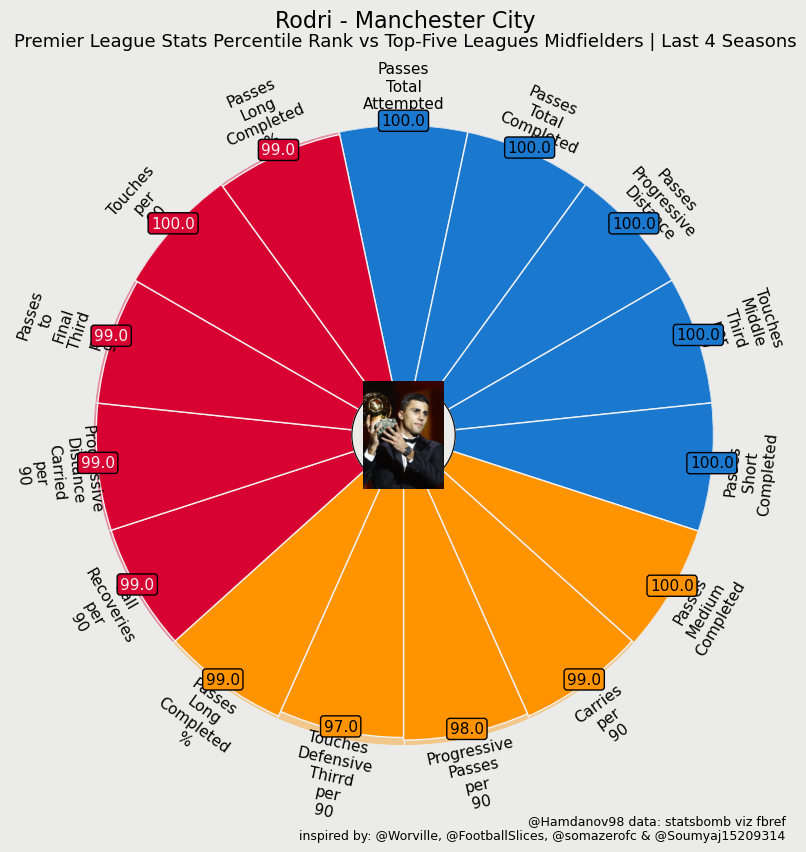

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rodri_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Rodri - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rodri_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


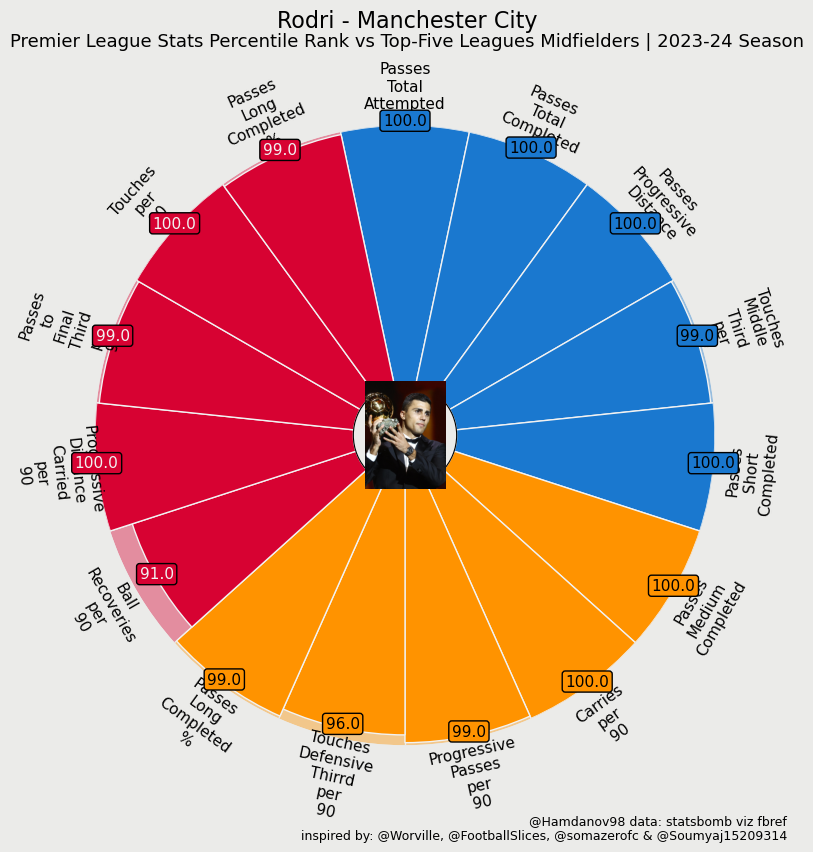

In [18]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rodri_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Rodri - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rodri_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in midfielder_players.columns:
        midfielder_players[feature]=-midfielder_players[feature]
        player_2024[feature]=-player_2024[feature]
        

In [20]:
# Normalize data
numerical_midfielder_players = midfielder_players[params].replace([np.inf, -np.inf], 0)
normalized_midfielder_players = (numerical_midfielder_players - numerical_midfielder_players.mean()) / numerical_midfielder_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_midfielder_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [21]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_midfielder_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=midfielder_players.index)

In [22]:
# Get de Ligt's row and compute cosine similarity
rodri_index = midfielder_players.index[midfielder_players['Player'] == 'Rodri'][0]
rodri_data = transformed_df.loc[rodri_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=rodri_index)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, rodri_data).flatten()
transformed_df['similarity_to_rodri'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_rodri', ascending=False).index
top_similar_players = midfielder_players.loc[top_similar_players_indices]

In [24]:
# Visualize the results
midfielder_players['similarity_to_rodri'] = transformed_df['similarity_to_rodri']
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_rodri', ascending=False)
midfielder_players_sorted

Unnamed: 0                      Player   Nation Pos  \
73          295             Bruno Guimarães   br BRA  MF   
123         507             Pierre Højbjerg   dk DEN  MF   
84          340                Maxime Lopez   fr FRA  MF   
122         489                Jordan Ferri   fr FRA  MF   
108         447                Granit Xhaka   ch SUI  MF   
134         544                 Declan Rice  eng ENG  MF   
65          263              Benjamin André   fr FRA  MF   
72          293            Maxence Caqueret   fr FRA  MF   
110         456            Fabián Ruiz Peña   es ESP  MF   
51          204           Rodrigo Bentancur   uy URU  MF   
15           53                        Koke   es ESP  MF   
11           31              Matteo Pessina   it ITA  MF   
52          210                    Jorginho   it ITA  MF   
106         439            Manuel Locatelli   it ITA  MF   
14           52             Boubacar Kamara   fr FRA  MF   
109         453               Daniel Parejo   es ESP  MF   
16           58                Remo Freuler   ch SUI  MF   
41          152  Andre-Frank Zambo Anguissa   cm CMR  MF   
88          354             Frenkie de Jong   nl NED  MF   
24           88               Leon Goretzka   de GER  MF   
19           66                 Kevin Kampl   si SVN  MF   
54          217             Jordan Veretout   fr FRA  MF   
17           60                  Toni Kroos   de GER  MF   
44          175            Hakan Çalhanoğlu   tr TUR  MF   
45          176                Ivan Rakitić   hr CRO  MF   
10           28             Laurent Abergel   fr FRA  MF   
130         531               Yves Bissouma   ml MLI  MF   
162         670               Johan Gastien   fr FRA  MF   
27           93          Idrissa Gana Gueye   sn SEN  MF   
13           43         Baptiste Santamaria   fr FRA  MF   
80          324                 Mikel Vesga   es ESP  MF   
18           64              İlkay Gündoğan   de GER  MF   
142         566           Stanislav Lobotka   sk SVK  MF   
83          339                 Luka Modrić   hr CRO  MF   
57          243            Pedro Chirivella   es ESP  MF   
55          236             Youssouf Fofana   fr FRA  MF   
0             2                 Wataru Endo   jp JPN  MF   
124         512                 Oriol Romeu   es ESP  MF   
4             9             Florian Neuhaus   de GER  MF   
95          403               Nemanja Matić   rs SRB  MF   
120         487                 Enzo Le Fée   fr FRA  MF   
79          319             Jude Bellingham  eng ENG  MF   
126         518              Nicolò Barella   it ITA  MF   
82          333         Alexis Mac Allister   ar ARG  MF   
22           82            Martín Zubimendi   es ESP  MF   
118         485               Mateo Kovačić   hr CRO  MF   
2             5             Ismaël Bennacer   dz ALG  MF   
64          257           Pierre Lees-Melou   fr FRA  MF   
1             3                  Unai López   es ESP  MF   
43          173             Rodrigo De Paul   ar ARG  MF   
113         468             Cheick Doucouré   ml MLI  MF   
71          292                Fran Beltrán   es ESP  MF   
172         701              Nabil Bentaleb   dz ALG  MF   
94          401           Nicolás Domínguez   ar ARG  MF   
98          416              Amadou Haidara   ml MLI  MF   
195         814              Moisés Caicedo   ec ECU  MF   
149         616           Salis Abdul Samed   gh GHA  MF   
125         515           Federico Valverde   uy URU  MF   
42          169              Nicolò Rovella   it ITA  MF   
107         441             Khéphren Thuram   fr FRA  MF   
96          412            Mattéo Guendouzi   fr FRA  MF   
202         850                Aleix García   es ESP  MF   
93          399                 Djibril Sow   ch SUI  MF   
34          135                Douglas Luiz   br BRA  MF   
87          350           Boubakary Soumaré   fr FRA  MF   
30          100           Maximilian Arnold  

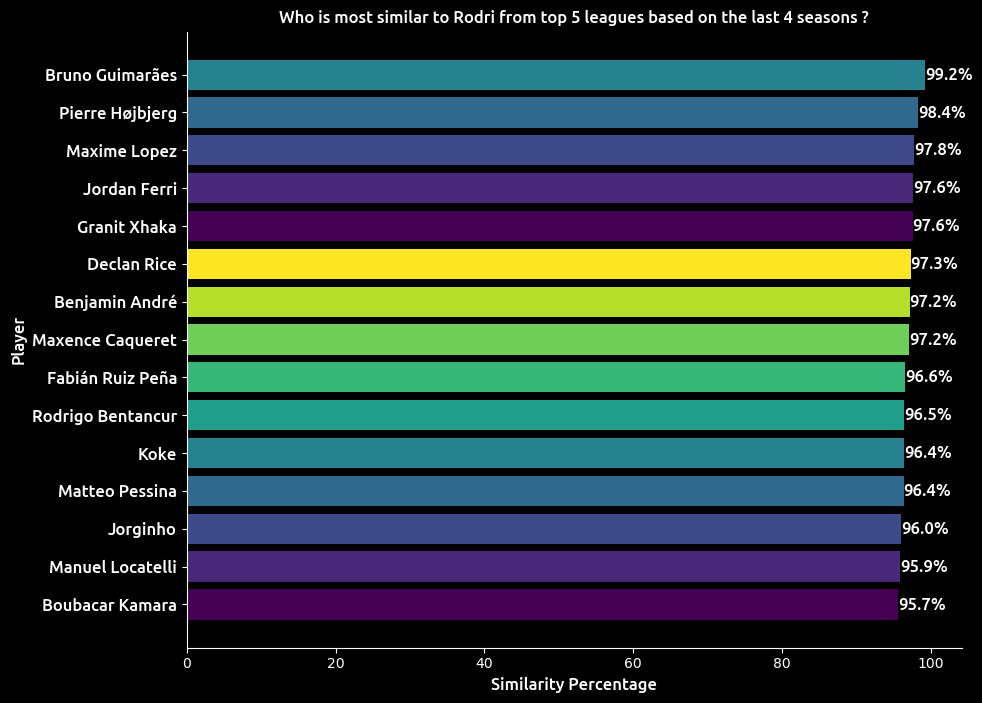

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the midfielder_players DataFrame by similarity_to_kroos in descending order
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_rodri', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(midfielder_players_sorted['Player'].head(15)[::-1], (midfielder_players_sorted['similarity_to_rodri'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Rodri from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(midfielder_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [26]:
Bruno=midfielder_players[midfielder_players['Player']=='Bruno Guimarães']
Bruno

Unnamed: 0           Player  Nation Pos  \
73         295  Bruno Guimarães  br BRA  MF   

                                    Squad  \
73  Newcastle Utd+Newcastle Utd+Lyon+Lyon   

                                                 Comp  Age    Born     MP  \
73  eng Premier League+eng Premier League+fr Ligue...  0.0  1997.0  139.0   

    Starts       Min    90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
73   120.0  10349377  115.8         0.16       0.32        0.15          0.31   

    xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
73      0.12          0.32        0.12            0.31               343.0   

    Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
73          201.0            58.6             104.0              30.32   

    Touches_per_90  Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  \
73           74.88                    2.13                   14.49   

    Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
73                   42.75                    18.7                    1.63   

    Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
73                      74.87                       2.96   

    Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
73                  1.74                      0.9            49.8   

    Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
73                 271.42                               117.37   

    Progressive_Carries_per_90  1/3_Carries_per_90  \
73                         1.9                2.05   

    Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
73                         0.38               -1.56                -1.76   

    Passes_Received_per_90  Progressive_Passes_Received_per_90  \
73                   56.66                                1.96   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  \
73                       18.88                     2.17   

    Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
73                   3.06                    0.1                  0.16   

    Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
73              0.09                     0.23                   3.06   

    Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
73                   0.34                   0.01                  0.03   

    Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
73              0.04                     0.03                   0.01   

    Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
73            6250.0            7329.0              85.28        108892.0   

    Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
73         31364.0            3049.0            3365.0              90.82   

    Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  \
73             2538.0             2857.0               88.83            649.0   

    Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  \
73            921.0             70.47             0.1        0.15       0.16   

    A-xAG_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
73           0.0               1.47               6.04   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
73                        1.73                         0.13   

    Progressive_Passes_per_90  Passes_Attempted_per_90  \
73                       7.95                    63.29   

    Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  \
73                    60.38                     2.61                     2.13   

    Through_Balls_per_90  Switches_per_90  Crosses_per_90  \
73                  0.63             0.77            0.97   

    Throw_Ins_Taken_per_90  Corner_Kicks_per_90  In_Corner_Kicks_per_90  \
73                    0.22                 0.

In [27]:
Andre=midfielder_players[midfielder_players['Player']=='Benjamin André']
Andre

Unnamed: 0          Player  Nation Pos  Squad        Comp  Age    Born  \
65         263  Benjamin André  fr FRA  MF  Lille  fr Ligue 1  0.0  1990.0   

       MP  Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
65  132.0   130.0  11123  123.7         0.06       0.08        0.06   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
65          0.08      0.06           0.1        0.06             0.1   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
65               128.0           78.0           60.94              47.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
65              36.72           77.62                    3.25   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
65                   17.22                   49.83                   11.23   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
65                    1.15                      77.62   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
65                       1.03                  0.63                     0.38   

    Carries_per_90  Total_Distance_per_90  \
65            51.6                 247.54   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
65                               109.48                        1.02   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
65                1.33                         0.05                -1.3   

    Dispossessed_per_90  Passes_Received_per_90  \
65                -0.99                   52.59   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
65                                1.66                        1.94   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
65                     0.16                   1.65                   0.02   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
65                  0.04              0.06                      0.1   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
65                   1.65                   0.11                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
65                   0.0              0.01                     0.03   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
65                    0.0            6647.0            8049.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
65              82.58        110823.0         32686.0            2951.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
65            3405.0              87.75             2587.0             2978.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
65               86.87            598.0            910.0             65.71   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
65             0.0        0.04       0.06         -0.02               0.62   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
65               6.54                        0.42   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
65                         0.06                       7.01   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
65                    65.07                    63.27                     1.59   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
65                     1.44                  0.14             0.62   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
65            0.53                    0.15                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
65                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  Passes_Of

In [28]:
Hojbjerg=midfielder_players[midfielder_players['Player']=='Pierre Højbjerg']
Hojbjerg

Unnamed: 0           Player  Nation Pos      Squad                Comp  \
123         507  Pierre Højbjerg  dk DEN  MF  Tottenham  eng Premier League   

     Age    Born     MP  Starts    Min    90s  Goals_per90  G+A_per90  \
123  0.0  1995.0  145.0   117.0  11058  122.9         0.06       0.15   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
123        0.06          0.15      0.05          0.11        0.05   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
123            0.11               160.0          107.0           66.88   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
123              49.0              30.63           83.29   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
123                    3.42                   20.12                   51.69   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
123                    12.3                    0.81   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
123                      83.29                        1.3   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
123                  0.87                      0.4           49.45   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
123                 227.57                               107.76   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
123                        1.18                1.15   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
123                         0.15               -1.04                 -0.7   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
123                   60.87                                1.37   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
123                        2.29                     0.27   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
123                   2.02                   0.05                  0.08   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
123              0.05                     0.03                   2.02   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
123                   0.26                   0.01                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
123               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
123            7997.0            9060.0              88.27        134756.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
123         38591.0            3779.0            4086.0              92.17   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
123             3164.0             3465.0               91.31   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
123            709.0            982.0              72.2             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
123        0.06       0.07          0.02               0.65   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
123               6.54                        0.81   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
123                         0.08                       6.75   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
123                    73.72                    70.68   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
123                     2.81                      2.3                  0.18   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
123              0.8            0.43                    0.36   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
123                 0.04                     0.0                

In [29]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
benjamin_percentile_ranks = round(players_percentile_ranks.iloc[[65]],0)

# Print the percentile ranks for the player
benjamin_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
65                                 81.0            96.0              97.0   

    Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
65             93.0               85.0               93.0   

    Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
65                    85.0                     88.0                    94.0   

    Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
65            91.0            92.0            96.0             78.0   

    Progressive_Carries_per_90  Passes_Total_Cmp%  
65                        35.0               53.0

In [30]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
hojbjerg_percentile_ranks = round(players_percentile_ranks.iloc[[123]],0)

# Print the percentile ranks for the player
hojbjerg_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
123                                 80.0            99.0              99.0   

     Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
123             97.0               95.0               93.0   

     Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
123                    94.0                     95.0                    97.0   

     Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
123            96.0            90.0            99.0             88.0   

     Progressive_Carries_per_90  Passes_Total_Cmp%  
123                        44.0               90.0

In [31]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
bruno_percentile_ranks = round(players_percentile_ranks.iloc[[73]],0)

# Print the percentile ranks for the player
bruno_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
73                                 86.0            96.0              96.0   

    Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
73             96.0               85.0               88.0   

    Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
73                    92.0                     85.0                    84.0   

    Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
73            88.0            91.0            95.0             87.0   

    Progressive_Carries_per_90  Passes_Total_Cmp%  
73                        75.0               72.0

In [32]:
benjamin_percentile_ranks_list = benjamin_percentile_ranks.values.flatten().tolist()

benjamin_percentile_ranks_list

[81.0,
 96.0,
 97.0,
 93.0,
 85.0,
 93.0,
 85.0,
 88.0,
 94.0,
 91.0,
 92.0,
 96.0,
 78.0,
 35.0,
 53.0]

In [33]:
hojbjerg_percentile_ranks_list = hojbjerg_percentile_ranks.values.flatten().tolist()

hojbjerg_percentile_ranks_list

[80.0,
 99.0,
 99.0,
 97.0,
 95.0,
 93.0,
 94.0,
 95.0,
 97.0,
 96.0,
 90.0,
 99.0,
 88.0,
 44.0,
 90.0]

In [34]:
bruno_percentile_ranks_list = bruno_percentile_ranks.values.flatten().tolist()

bruno_percentile_ranks_list

[86.0,
 96.0,
 96.0,
 96.0,
 85.0,
 88.0,
 92.0,
 85.0,
 84.0,
 88.0,
 91.0,
 95.0,
 87.0,
 75.0,
 72.0]

In [35]:
image_path = "../Rice/Rice/Andre.jpg"
fdj_cropped = Image.open(image_path)


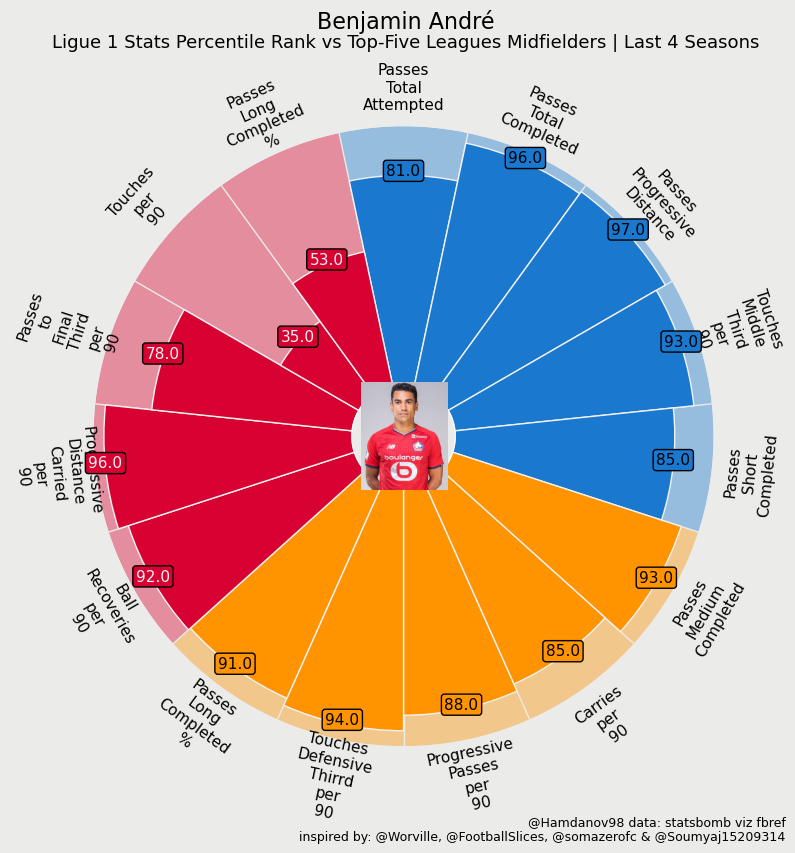

In [36]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    benjamin_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Benjamin André", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Andre_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [37]:
image_path = "Hojbjerg.jpg"
fdj_cropped = Image.open(image_path)


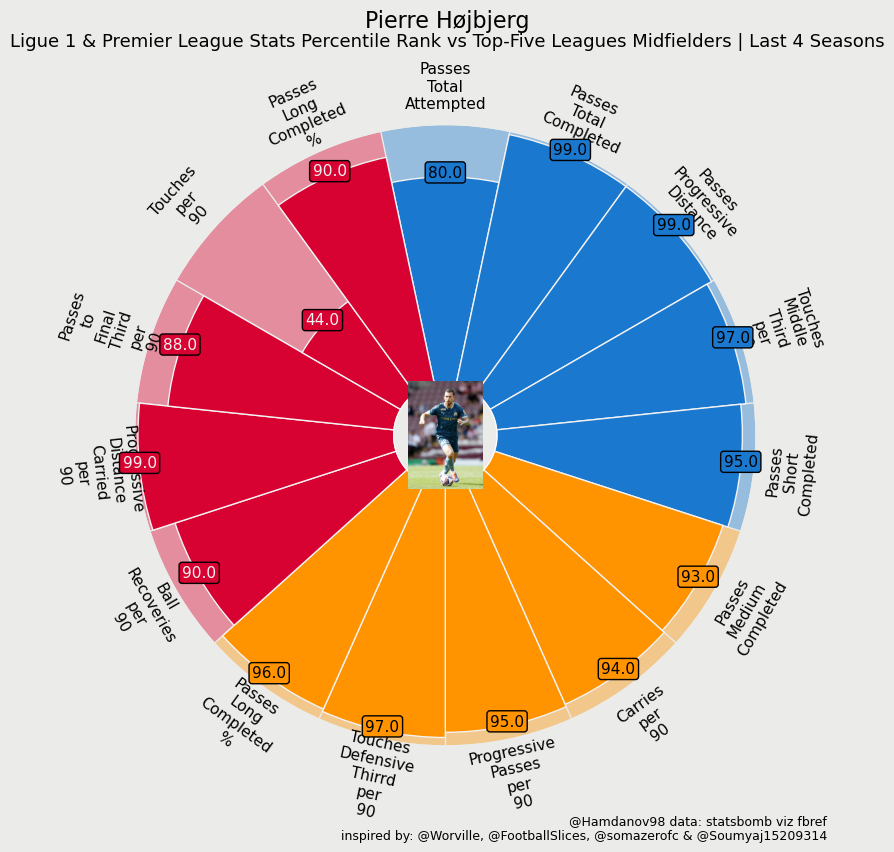

In [38]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    hojbjerg_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Pierre Højbjerg", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 & Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Hojbjerg_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [39]:
image_path = "Guimares.jpg"
fdj_cropped = Image.open(image_path)


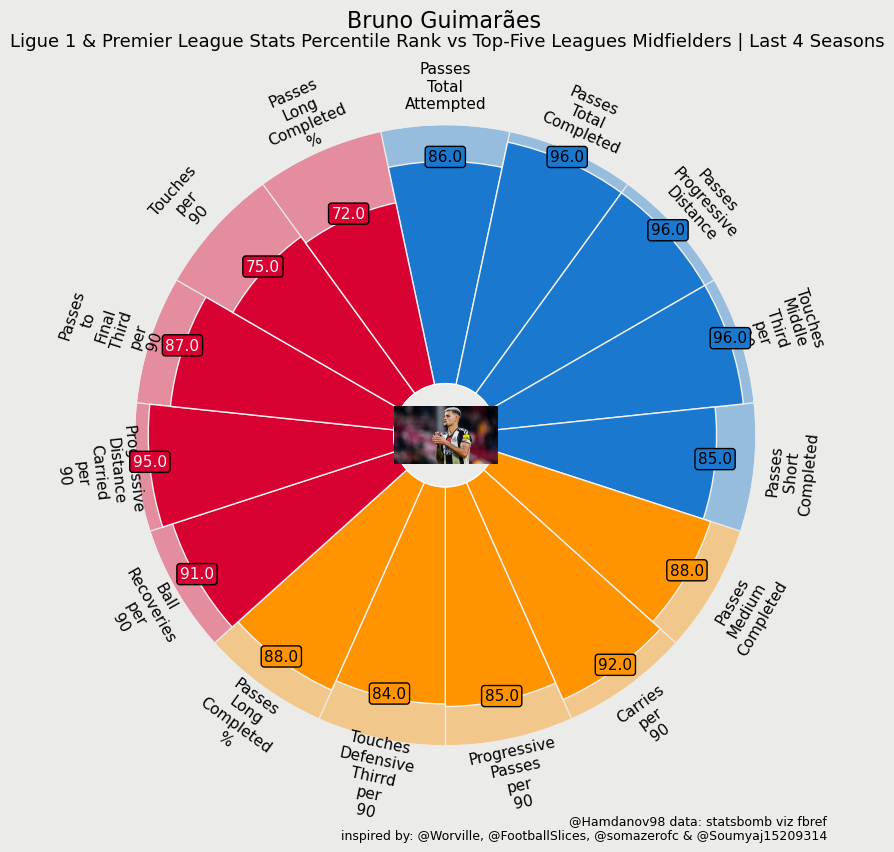

In [40]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    bruno_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Bruno Guimarães ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 & Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Bruno_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [41]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [42]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [43]:
# Get de Ligt's row and compute cosine similarity
rodri_2024_index = player_2024.index[player_2024['Player'] == 'Rodri'][0]
rodri_2024_data = transformed_df.loc[rodri_2024_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=rodri_2024_index)

In [44]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, rodri_2024_data).flatten()
transformed_df['similarity_to_rodri_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_rodri_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [45]:
# Visualize the results
player_2024['similarity_to_rodri_2024'] = transformed_df['similarity_to_rodri_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_rodri_2024', ascending=False)
player_2024_sorted

Unnamed: 0                      Player   Nation Pos  \
327          84               Nemanja Matić   rs SRB  MF   
16          217              Nicolò Barella   it ITA  MF   
312        2789                Granit Xhaka   ch SUI  MF   
112        1070              İlkay Gündoğan   de GER  MF   
98          955               Johan Gastien   fr FRA  MF   
221        2040             Leandro Paredes   ar ARG  MF   
44          430            Hakan Çalhanoğlu   tr TUR  MF   
1             7             Laurent Abergel   fr FRA  MF   
141        1351                        Koke   es ESP  MF   
9           108              Benjamin André   fr FRA  MF   
249        2258            Kirian Rodríguez   es ESP  MF   
85          866              Enzo Fernández   ar ARG  MF   
169        1548         Alexis Mac Allister   ar ARG  MF   
110        1062             Bruno Guimarães   br BRA  MF   
333         119              Angelo Stiller   de GER  MF   
100         990                 Angel Gomes  eng ENG  MF   
86          875                Jordan Ferri   fr FRA  MF   
148        1389                  Toni Kroos   de GER  MF   
242        2225                 Declan Rice  eng ENG  MF   
190        1717                 Arthur Melo   br BRA  MF   
49          456            Maxence Caqueret   fr FRA  MF   
265        2379              Xaver Schlager   at AUT  MF   
87          888             Youssouf Fofana   fr FRA  MF   
104        1014               Leon Goretzka   de GER  MF   
99          978               Billy Gilmour  sct SCO  MF   
292        2600            Corentin Tolisso   fr FRA  MF   
286        2577                 Teddy Teuma   mt MLT  MF   
300        2668           Federico Valverde   uy URU  MF   
166        1531                Douglas Luiz   br BRA  MF   
229        2106              Matteo Pessina   it ITA  MF   
162        1512                  Unai López   es ESP  MF   
41          422              Moisés Caicedo   ec ECU  MF   
198        1782                 Luka Modrić   hr CRO  MF   
26          279              Nabil Bentaleb   dz ALG  MF   
53          528            Pedro Chirivella   es ESP  MF   
96          937                Aleix García   es ESP  MF   
154        1454           Pierre Lees-Melou   fr FRA  MF   
2            28                 Yacine Adli   fr FRA  MF   
219        2022           Exequiel Palacios   ar ARG  MF   
68          657             Rodrigo De Paul   ar ARG  MF   
30          313               Yves Bissouma   ml MLI  MF   
262        2351         Baptiste Santamaria   fr FRA  MF   
315        2835             Piotr Zieliński   pl POL  MF   
123        1171             Pierre Højbjerg   dk DEN  MF   
157        1493           Stanislav Lobotka   sk SVK  MF   
125        1183                   Ivan Ilić   rs SRB  MF   
130        1244             Frenkie de Jong   nl NED  MF   
222        2041               Daniel Parejo   es ESP  MF   
331         117             Stijn Spierings   nl NED  MF   
170        1551              James Maddison  eng ENG  MF   
158        1494            Manuel Locatelli   it ITA  MF   
245        2248                   Marc Roca   es ESP  MF   
83          860              Lewis Ferguson  sct SCO  MF   
77          795                     Éderson   br BRA  MF   
94          931             Conor Gallagher  eng ENG  MF   
284        2540          Dominik Szoboszlai   hu HUN  MF   
91          909                Remo Freuler   ch SUI  MF   
298        2650       Manuel Ugarte Ribeiro   uy URU  MF   
314        2813  Andre-Frank Zambo Anguissa   cm CMR  MF   
4            62                Luis Alberto   es ESP  MF   
145        1377               Mateo Kovačić   hr CRO  MF   
303        2691             Jordan Veretout   fr FRA  MF   
280        2511                Kevin Stöger   at AUT  MF   
3            31            Michel Aebischer   ch SUI  MF   
317        2849             Martin Ødegaard   no NOR  MF   
11          139           Maximilian Arnold  

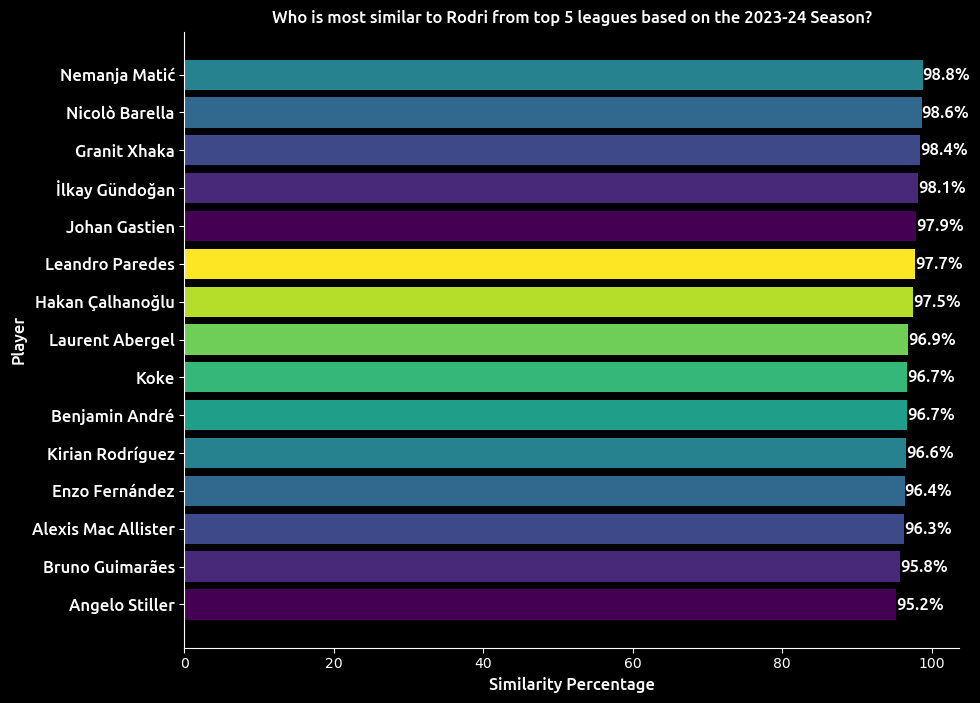

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_rodri_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_rodri_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_rodri_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Rodri from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
